# In this notebook I'm going to use Decision Tree Classifier's

The idea here is that I'm going to use a simple decision tree model to try to determine what flower species it is given a couple of columns that represent the species characteristics

With a decision Tree we need to define some things up front, our features/variables/arguments which are basically describing what values our category (Species) has, so we are going to try and see can we determine the correct species using just a few values and with what level of accuracy we can make such predictions.

Drew inspiration from the following articles/resources:

https://www.kaggle.com/learn/intro-to-machine-learning
    
https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d


In [19]:
import pandas as pd
#from sklearn.tree import DecisionTreeRegressor #specify the model originally I used DecisionTreeRegressor
'''Originally I used a DecisionTreeRegressor, but later learned DecisionTreeClassifier is more appropriate for 
this kind of data where we have are trying to predict a category e.g. species not a value e.g. petal length'''
from sklearn.tree import DecisionTreeClassifier, plot_tree #importing the DecisionTreeClassifier from sklearn tree library

#iris_df is the dataframe storing the full iris dataset
iris_df = pd.read_csv('..\iris-flower-dataset\IRIS.csv')

#y is the species of iris flowers, we'll be trying to predict this using our other columns, this is my first step in splitting the data for the model
y = iris_df['species']
species_names = y.unique()

#Features, these are my columns of interest that I think will factor into determining flower species
feature_names = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

#X is a dataframe of just the columns from feature_names
X = iris_df[feature_names]

#define iris_model object from DecisionTreeRegressor, using random_state=0 as it makes the result consistent
iris_model = DecisionTreeClassifier(random_state=0)

iris_model.fit(X,y)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

By this point we've:
- Loaded in our dataset
- Defined our y which is the Species, this is the value we want to determine from our features
- Defined our features for which I'm using all remaining columns
- I convert the the Species to numeric equivalents as the model can't work with strings
- I define a Decision Tree Regressor Object
- Fit the model

In [20]:
model_score = iris_model.score(X,y)
print(model_score)
predictions = iris_model.predict(X)
#print(predictions)
#print(y)

1.0


Scoring the model, we get 1, what this means is that using X to predict y with this model we get a 100% accuracy. Or at least we have 100% accuracy for this sample, in order to get a more realistic interpretation of this I'm now going to split up this data into a training and validating set.

Next I am going to visualise how this model looks in it's current iteration, but I will improve upon this in the succeding cells.

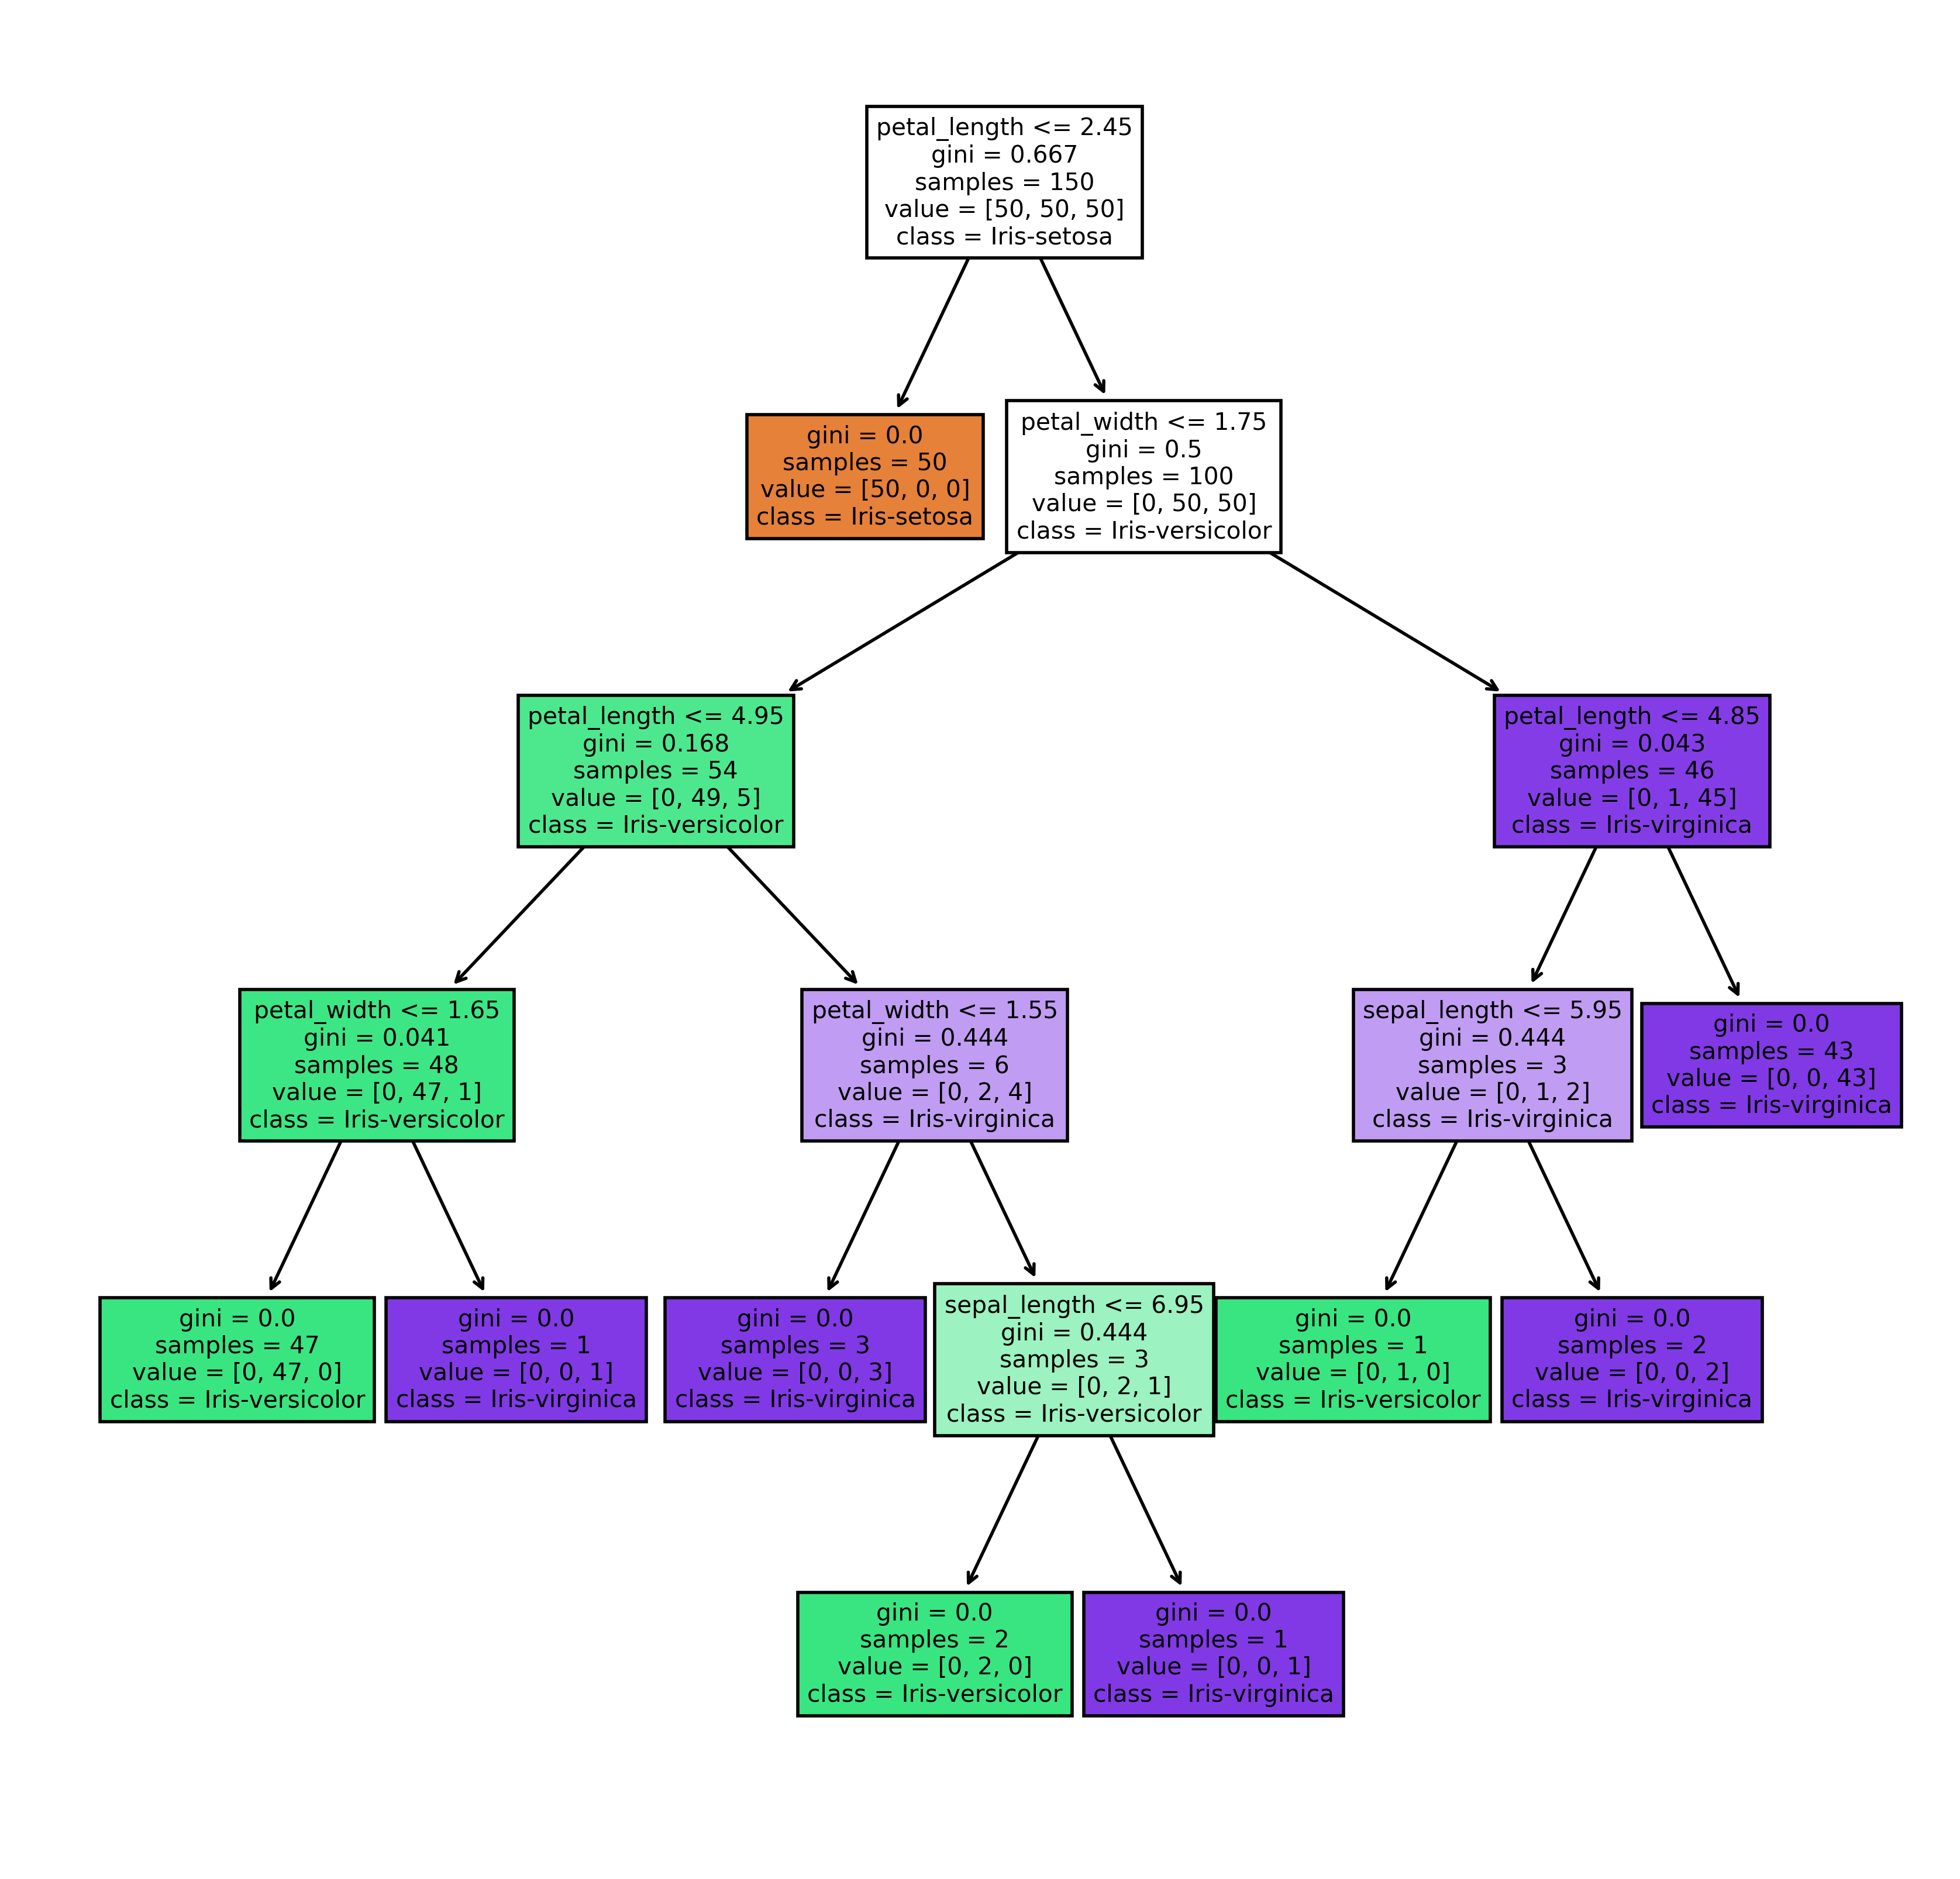

In [22]:
from sklearn import tree
from matplotlib import pyplot as plt
#tree.plot_tree(iris_model)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)
plt.show()

### Validating the model

Now I'm going to try to validate my model, to do this I will split my data into training and validation groups, the training data will go into the model, the validating data will be left to the side to later act as a test for how accurate our model is.

As mentioned above, the issue with the previous model was that we were fitting it off all the data, which results in a skewed result and it also leaves us with no way of validating whether we've got a good model or not as all our data has gone into it, of course it will be able to accurately predict from this.

In [23]:
from sklearn.model_selection import train_test_split

# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeClassifier(random_state=0)
# Fit model
iris_model.fit(train_X, train_y)

print("Model score, how accurate it is when tested with the validation data:")
print(iris_model.score(val_X, val_y))

# get predicted category on validation data
print("Using the validation X data what predictions we get for species:")
val_predictions = iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

Model score, how accurate it is when tested with the validation data:
0.9736842105263158
Using the validation X data what predictions we get for species:
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


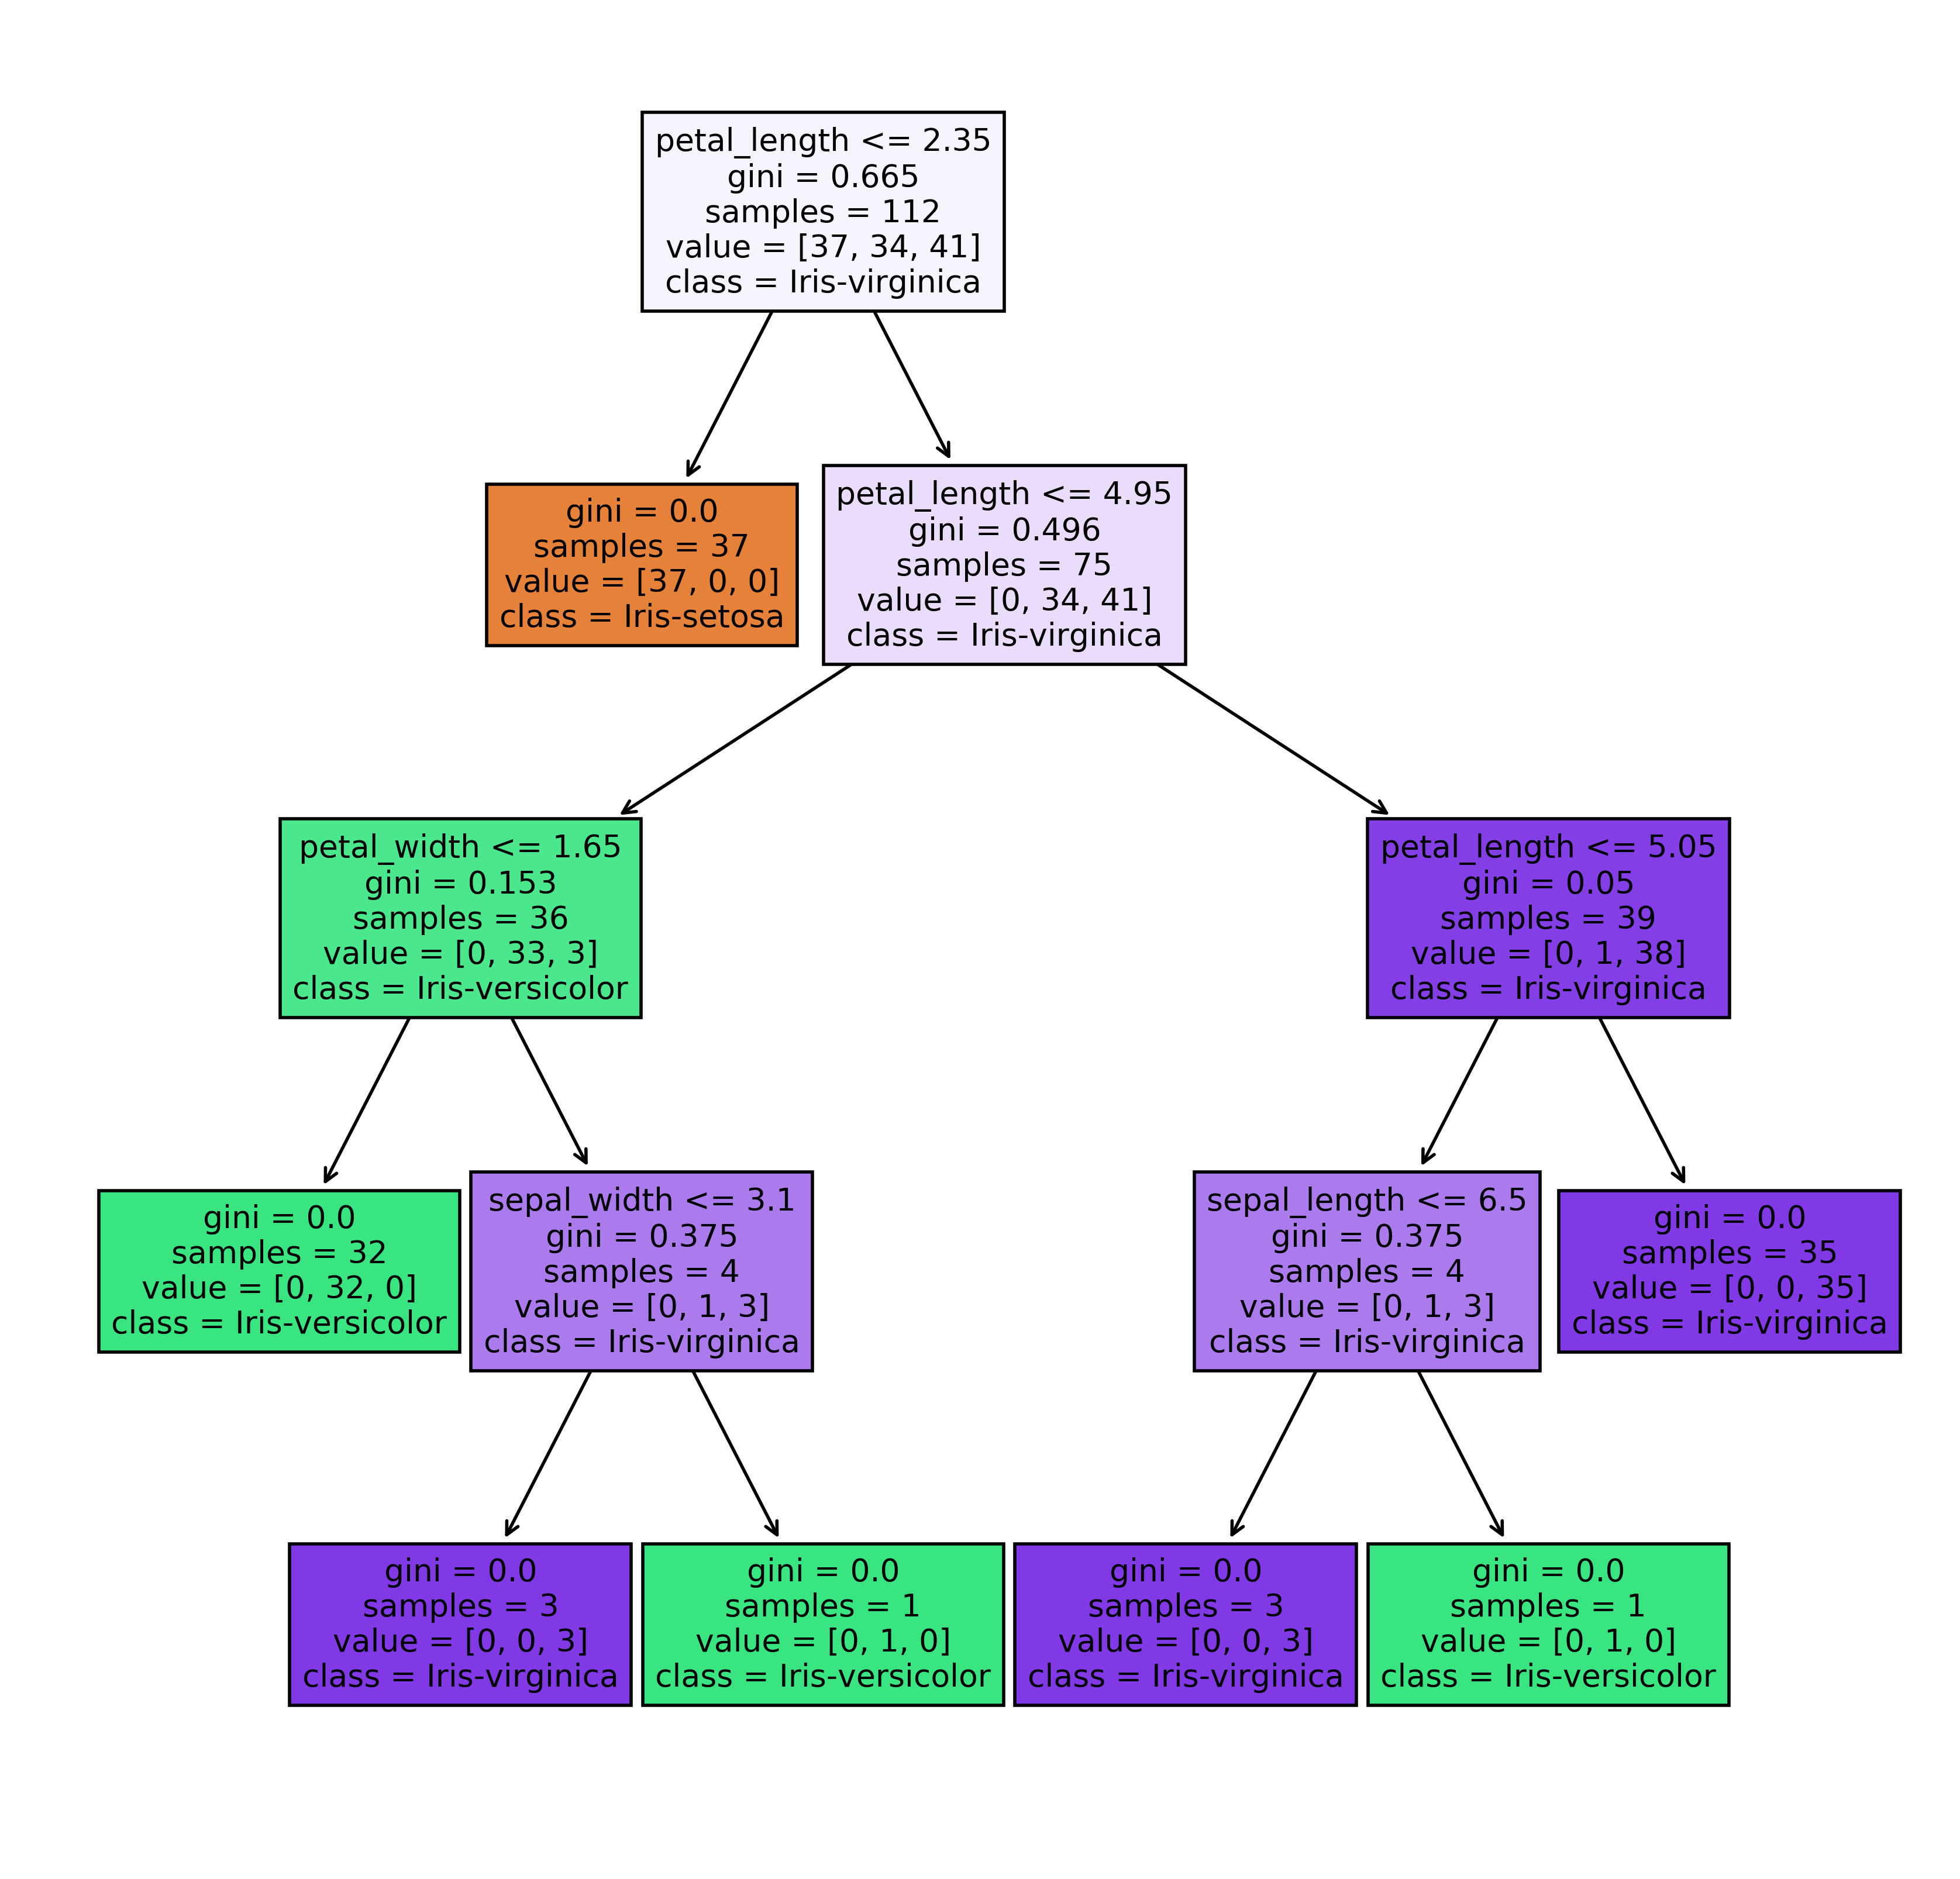

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)
plt.show()

### Interpreting the plot
The plot we've generated for our model shows that we are using a combination fo petal_width, petal_length, sepal_width and sepal_length branches to get to our Species and in the case of Iris-Setosa this is very quick, simply when the petal_length is < 2.35

This next cell of code is a long hand way of getting the level of accuracy for our model

In [26]:
#true count will increment if our validation y data matches our validation predictions
true_count = 0
for i in range(len(val_y)):
    if val_y.iloc[i] == val_predictions[i]:
        true_count += 1

print("Accuracy of our model on validation data")
#This gives same value as model.score() would but this is just a nice way of showing what's happening I think
print(f"{true_count/len(val_y)}")

Accuracy of our model on validation data
0.9736842105263158


## Optimising the model
I'm going to add a function next to take in our training and validating data and also use a max_leaf_node argument, the idea here is I'm going to use this function as part of a loop in order to determine at what point do I get the most accurate result I can but with the fewest leaf nodes.

(Leaf nodes are the end nodes of the tree, they come off branches - makes somewhat intuitive sense I hope)

In [9]:
#function returns the score for the model it fits
def get_score(max_leaf_nodes, train_X, val_X, train_y, val_y):
    #model takes in a max number of leaf nodes to use
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    model_score = model.score(val_X, val_y)
    return(model_score)

Going to use this function then to try determine the max amount of leaf nodes to have in my decision tree model

In [29]:
#I'm going to see from 2-10 leaf nodes what is the optimal to pick
candidate_max_leaf_nodes = list(range(2,11))

#scores will be stored in a dict object with the number of leaf nodes as the key
leaf_score_dict = {}
#loop through the list of maximum leaf nodes
for i in candidate_max_leaf_nodes:
    curr_score = get_score(i, train_X, val_X, train_y, val_y)
    # current leaf node key is paired with curr_score
    leaf_score_dict[i] = curr_score
    
# Store the best value of max_leaf_nodes something from 2-9
best_leaf_node_count = int(max(leaf_score_dict, key=leaf_score_dict.get))
#show each of the scores for the tested number of leaf nodes
print("\nThe accuracy of different max leaf nodes:")
print(leaf_score_dict)
print("\nThe optimal number of leaf nodes is:")
print(best_leaf_node_count)


The accuracy of different max leaf nodes:
{2: 0.5789473684210527, 3: 0.8947368421052632, 4: 0.9736842105263158, 5: 0.9736842105263158, 6: 0.9736842105263158, 7: 0.9736842105263158, 8: 0.9736842105263158, 9: 0.9736842105263158, 10: 0.9736842105263158}

The optimal number of leaf nodes is:
4


### Interpreting the above result
So it look's like 4 is the best number of nodes, and printing all the mean absolute error for the different nodes shows us that it doesn't improve accuracy after 4

In [31]:
# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=best_leaf_node_count)
# Fit model
iris_model.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Just to make sure our score is still good at this point

In [32]:
#get the model score like before to show that with limit of 4 on max leaves we still have same score/accuracy
print(iris_model.score(val_X, val_y))

0.9736842105263158


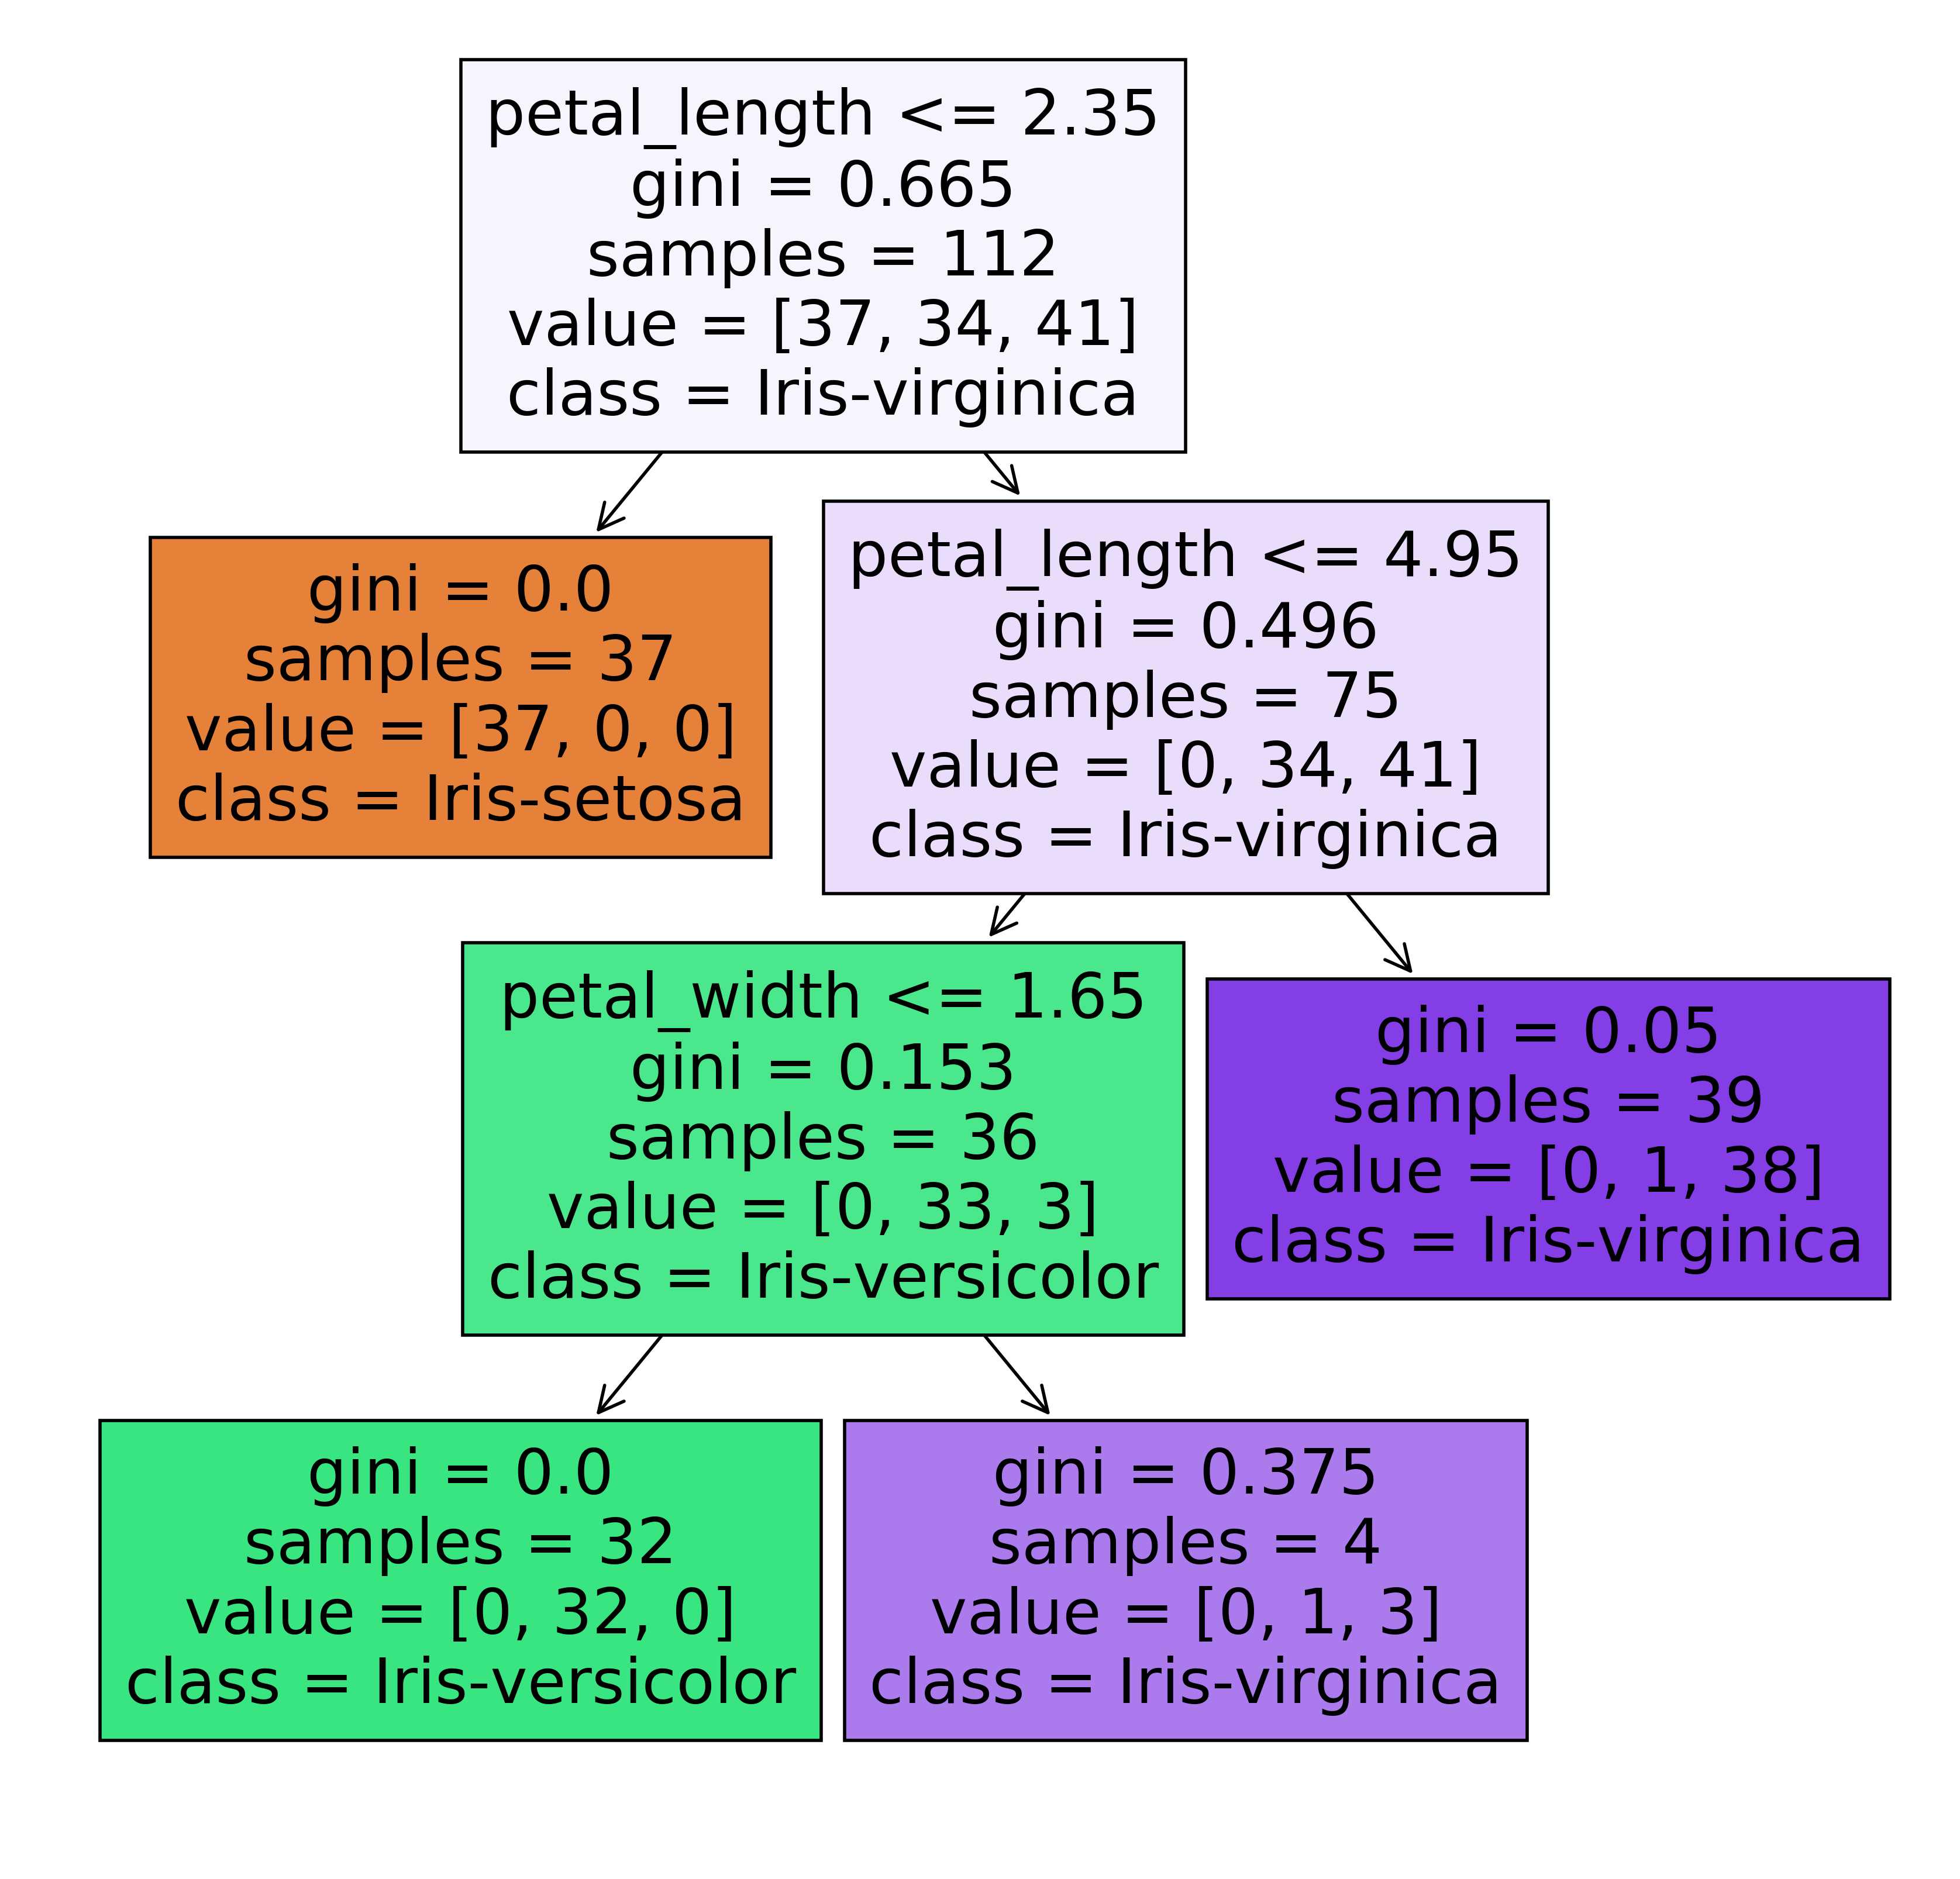

In [34]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(iris_model,
               feature_names = feature_names, 
               class_names=species_names,
               filled = True)
plt.show()

### Interpreting our latest model plot
As we can see, we have a much more compact decision tree now, but this is still as accurate as the earlier one which had no limit and in fact this will avoid the risk of overfitting.
Interestingly we now only have 2 columns used in this tree petal_width and petal_length, while still retaining the same level of accuracy, which shows that sepal_length and sepal_width in this case don't add any meaningful information for predicting our species of flower.

## Fun little aside
So we have seen from the above the score we get for an optimal DecisionTreeClassifier model on the Iris dataset, but what if we include the two excluded columns only.

My naming convention below is not very creative but hopefully it's still easy to follow, I am reusing variable names, so if you execute cell's above this after executing the below cell's you may get some odd behavious.

In [35]:
#fitting our new bad model

bad_feature_names = ['sepal_length', 'sepal_width']
#X is a dataframe of just the columns from feature_names
bad_X = iris_df[bad_feature_names]

# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(bad_X, y, random_state=0)

#define iris_model object from DecisionTreeRegressor, using random_state=0 as it makes the result consistent
bad_iris_model = DecisionTreeClassifier(random_state=0)

bad_iris_model.fit(bad_X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Same idea as earlier, I want to determine what are the optimal number of nodes for this worse model.

In [36]:
candidate_max_leaf_nodes = list(range(2,10))
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_score_dict = {}
for i in candidate_max_leaf_nodes:
    curr_score = get_score(i, train_X, val_X, train_y, val_y)
    leaf_score_dict[i] = curr_score
    
# Store the best value of max_leaf_nodes something from 2-9
best_leaf_node_count = int(max(leaf_score_dict, key=leaf_score_dict.get))
print("\nThe accuracy of different max leaf nodes:")
print(leaf_score_dict)
print("\nThe optimal number of leaf nodes is:")
print(best_leaf_node_count)


The accuracy of different max leaf nodes:
{2: 0.5263157894736842, 3: 0.5263157894736842, 4: 0.5789473684210527, 5: 0.631578947368421, 6: 0.631578947368421, 7: 0.631578947368421, 8: 0.631578947368421, 9: 0.631578947368421}

The optimal number of leaf nodes is:
5


So the optimal number of leaf nodes for this model is 5 (previously this was 4)

In [42]:
# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(bad_X, y, random_state=0)
# Define model
bad_iris_model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=best_leaf_node_count)
# Fit model
bad_iris_model.fit(train_X, train_y)

# get predicted category on validation data
val_predictions = bad_iris_model.predict(val_X)
#print the predicted values for Y
print("Predicted values:")
print(val_predictions)

print("\nScore for the bad model:")
print(bad_iris_model.score(val_X, val_y))

Predicted values:
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']

Score for the bad model:
0.631578947368421


The new bad model gives a score of .63, so it's significantly less accurate in the absence of petal_length and petal_width.
That being said it's still not awful as it is more likely to correctly predict than to make a mistake, though only just...

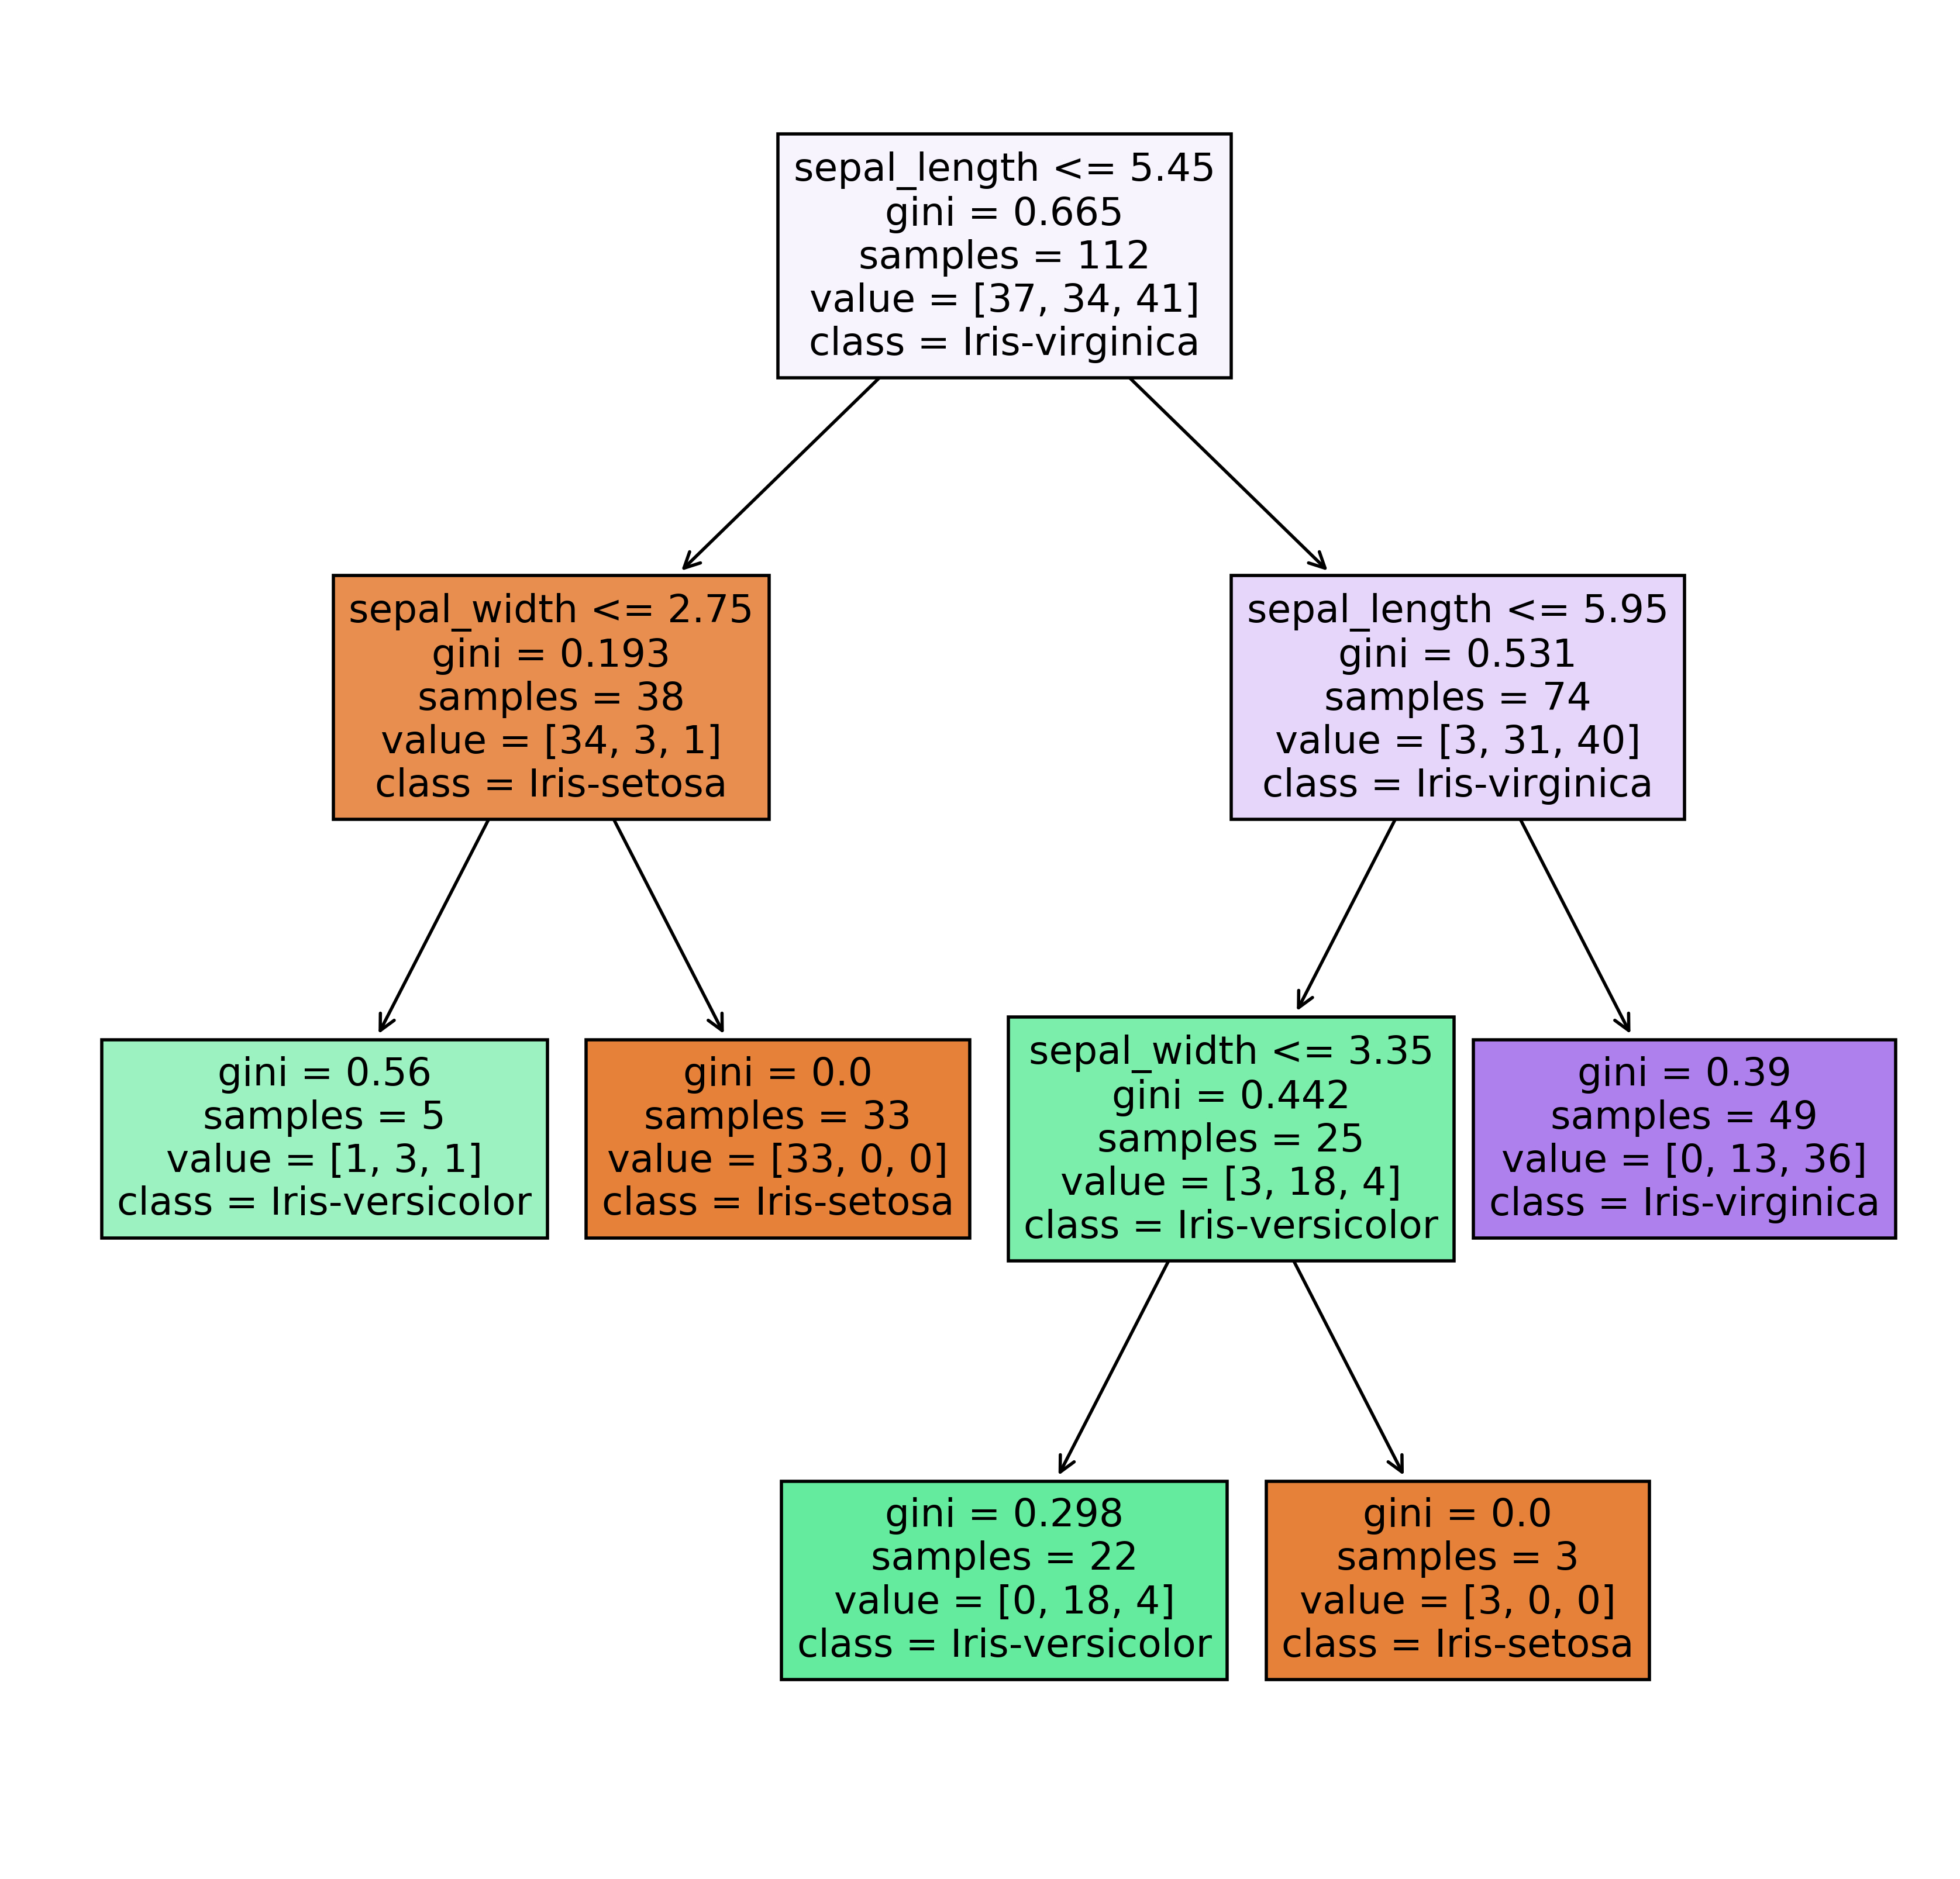

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=400)
tree.plot_tree(bad_iris_model,
               feature_names = bad_feature_names, 
               class_names=species_names,
               filled = True)
plt.show()

Lastly we see the plot for the 'bad' model, not much to be said about this really.